<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.
Use the version as per your python version.


In [9]:
!pip install yfinance
!pip install bs4
!pip install nbformat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 36.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.7/104.7 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 111.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 88.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 100.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 43.0 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.8-cp311-cp311-linux_x86_64.whl size=300749 sha256=6854860c2a9bafe617

In [11]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [ ]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [ ]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [47]:
!pip install yfinance

import yfinance as yf

tesla_ticker = yf.Ticker("TSLA")
print(tesla_ticker.info)

{'address1': '1 Tesla Road', 'city': 'Austin', 'state': 'TX', 'zip': '78725', 'country': 'United States', 'phone': '512 516 8177', 'website': 'https://www.tesla.com', 'industry': 'Auto Manufacturers', 'industryKey': 'auto-manufacturers', 'industryDisp': 'Auto Manufacturers', 'sector': 'Consumer Cyclical', 'sectorKey': 'consumer-cyclical', 'sectorDisp': 'Consumer Cyclical', 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, body shop and parts, supercharging, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehicle sales, a n

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [4]:
tesla_data = tesla_ticker.history(period="max")
print(tesla_data.head())



                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [54]:
tesla_data.reset_index(inplace=True)
print(tesla_data.head())

   index                      Date      Open      High       Low     Close  \
0      0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1      1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2      2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3      3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4      4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [1]:
import requests 
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.text
print(html_data)



<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
		<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>
		<meta name="description" content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla r

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [13]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
  <title>
   Tesla Revenue 2010-2022 | TSLA | MacroTrends
  </title>
  <meta content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla revenue for the quarter end

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [26]:
import pandas as pd
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_data, 'html.parser')

table_body = soup.find_all("tbody")[1]  

data = []

}rows = table_body.find_all("tr")
for row in rows:
    cols = row.find_all("td")
}    data.append([col.text.strip() for col in cols])

}tesla_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])

}print(tesla_revenue.head())


         Date  Revenue
0  2022-09-30  $21,454
1  2022-06-30  $16,934
2  2022-03-31  $18,756
3  2021-12-31  $17,719
4  2021-09-30  $13,757


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [30]:
import pandas as pd
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_data, 'html.parser')

table_body = soup.find_all("tbody")[1]  

data = []

rows = table_body.find_all("tr")
for row in rows:
    cols = row.find_all("td")
    data.append([col.text.strip() for col in cols])


tesla_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$', "", regex=True)


print(tesla_revenue.head())



         Date Revenue
0  2022-09-30   21454
1  2022-06-30   16934
2  2022-03-31   18756
3  2021-12-31   17719
4  2021-09-30   13757


Execute the following lines to remove an null or empty strings in the Revenue column.


In [26]:
import pandas as pd
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_data, 'html.parser')

tabla = soup.find('table')

rows = tabla.find_all('tr')

data = []
for row in rows[1:]:  
    cols = row.find_all('td')
    data.append([col.text.strip() for col in cols])

tesla_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])

tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$', "", regex=True)
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

print(tesla_revenue)


    Date Revenue
0   2021   53823
1   2020   31536
2   2019   24578
3   2018   21461
4   2017   11759
5   2016    7000
6   2015    4046
7   2014    3198
8   2013    2013
9   2012     413
10  2011     204
11  2010     117
12  2009     112


Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [33]:
import pandas as pd
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_data, 'html.parser')

table_body = soup.find_all("tbody")[1]  

data = []

rows = table_body.find_all("tr")
for row in rows:
    cols = row.find_all("td")
    data.append([col.text.strip() for col in cols])


tesla_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$', "", regex=True)

print(tesla_revenue.tail())


          Date Revenue
49  2010-06-30      28
50  2010-03-31      21
51  2009-12-31        
52  2009-09-30      46
53  2009-06-30      27


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [29]:
!pip install yfinance

import yfinance as yf

gamestop = yf.Ticker("GME")
print(gamestop.info)

{'address1': '625 Westport Parkway', 'city': 'Grapevine', 'state': 'TX', 'zip': '76051', 'country': 'United States', 'phone': '817 424 2000', 'website': 'https://www.gamestop.com', 'industry': 'Specialty Retail', 'industryKey': 'specialty-retail', 'industryDisp': 'Specialty Retail', 'sector': 'Consumer Cyclical', 'sectorKey': 'consumer-cyclical', 'sectorDisp': 'Consumer Cyclical', 'longBusinessSummary': 'GameStop Corp., a specialty retailer, provides games and entertainment products through its stores and ecommerce platforms in the United States, Canada, Australia, and Europe. The company sells new and pre-owned gaming platforms; accessories, such as controllers, gaming headsets, and virtual reality products; new and pre-owned gaming software; and in-game digital currency, digital downloadable content, and full-game downloads. It sells collectibles comprising apparel, toys, trading cards, gadgets, and other retail products for pop culture and technology enthusiasts, as well as engages 

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [31]:
gme_data = gamestop.history(period="max")
print(gme_data)

                                Open       High        Low      Close  \
Date                                                                    
2002-02-13 00:00:00-05:00   1.620129   1.693350   1.603296   1.691667   
2002-02-14 00:00:00-05:00   1.712707   1.716074   1.670626   1.683250   
2002-02-15 00:00:00-05:00   1.683250   1.687458   1.658001   1.674834   
2002-02-19 00:00:00-05:00   1.666418   1.666418   1.578047   1.607504   
2002-02-20 00:00:00-05:00   1.615920   1.662210   1.603296   1.662210   
...                              ...        ...        ...        ...   
2024-12-18 00:00:00-05:00  31.100000  31.700001  28.340000  28.549999   
2024-12-19 00:00:00-05:00  29.160000  30.600000  28.820000  29.000000   
2024-12-20 00:00:00-05:00  28.540001  30.520000  28.309999  29.820000   
2024-12-23 00:00:00-05:00  29.820000  31.110001  29.780001  30.900000   
2024-12-24 00:00:00-05:00  31.000000  31.594000  30.580000  31.139999   

                             Volume  Dividends  St

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [32]:
gme_data = gamestop.history(period="max")
gme_data.reset_index(inplace=True)
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [21]:
import requests 
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
html_data_2 = response.text
print(html_data_2)

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style=""><!--<![endif]--><head><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><script type="text/javascript" async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/analytics.js.download"></script><script async="" type="text/javascript" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/gpt.js.download"></script><script async="" src="./

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [34]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_data_2, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style="">
 <!--<![endif]-->
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <script async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/analytics.js.download" type="text/javascript">
  </script>
  <script async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/gpt.js.download" type="text/javascript">
  </script>
  <s

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [35]:
import pandas as pd
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_data_2, 'html.parser')

table_body = soup.find_all("tbody")[1]  
rows = tabla.find_all('tr') 
data = []
for row in rows[1:]:  
    cols = row.find_all('td')
    data.append([col.text.strip() for col in cols]) 


gamestop = pd.DataFrame(data, columns=["Date", "Revenue"]) 
gamestop["Revenue"] = gamestop['Revenue'].str.replace(',|\$', "", regex=True)
print(gamestop)

    Date Revenue
0   2020    6466
1   2019    8285
2   2018    8547
3   2017    7965
4   2016    9364
5   2015    9296
6   2014    9040
7   2013    8887
8   2012    9551
9   2011    9474
10  2010    9078
11  2009    8806
12  2008    7094
13  2007    5319
14  2006    3092
15  2005    1843


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [37]:
import pandas as pd
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_data_2, 'html.parser')

table_body = soup.find_all("tbody")[1]  

data = []

rows = table_body.find_all("tr")
for row in rows:
    cols = row.find_all("td")
    data.append([col.text.strip() for col in cols])

gamestop_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$', "", regex=True)


print(gamestop_revenue.tail())
 


          Date Revenue
57  2006-01-31  $1,667
58  2005-10-31    $534
59  2005-07-31    $416
60  2005-04-30    $475
61  2005-01-31    $709


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


import pandas as pd
from bs4 import BeautifulSoup
import plotly.graph_objects as go

# Función para graficar
def make_graph(df, x_column, y_column, title):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df[x_column], y=df[y_column], mode='lines+markers', name=y_column))
    fig.update_layout(
        title=title,
        xaxis_title=x_column,
        yaxis_title=y_column,
        xaxis=dict(
            showgrid=True,
            tickformat='%b %Y',  # Mostrar meses y años
            range=[df[x_column].min(), df[x_column].max()]  # Ajustar rango para incluir todo el período
        ),
        yaxis=dict(showgrid=True),
    )
    return fig

# Procesamiento de datos
soup = BeautifulSoup(html_data, 'html.parser')
tabla = soup.find('table')
rows = tabla.find_all('tr') 
data = []

for row in rows[1:]:  
    cols = row.find_all('td')
    data.append([col.text.strip() for col in cols])

tesla_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])

# Limpieza de datos
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$', "", regex=True)
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'], errors='coerce')
tesla_revenue.dropna(subset=['Date', 'Revenue'], inplace=True)
tesla_revenue.sort_values(by='Date', inplace=True)

# Filtrar datos hasta junio de 2021
tesla_revenue = tesla_revenue[tesla_revenue['Date'] <= '2021-06-30']

# Graficar
fig = make_graph(tesla_revenue, x_column='Date', y_column='Revenue', title="Tesla Stock Revenue Over Time (Up to June 2021)")
fig.show()
<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


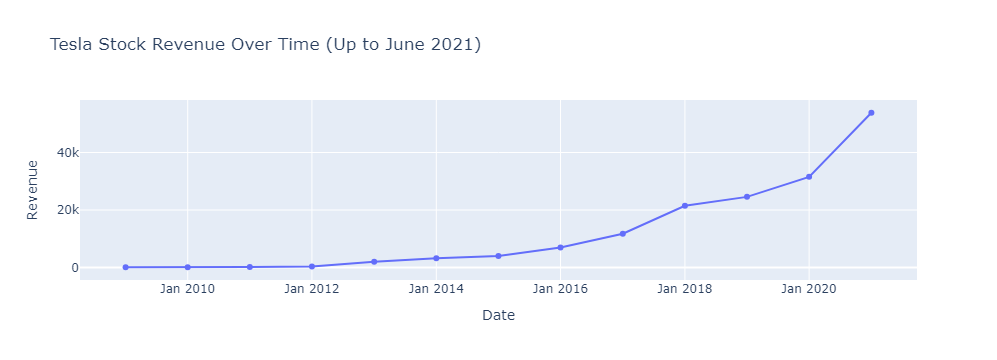

In [39]:
import pandas as pd
from bs4 import BeautifulSoup
import plotly.graph_objects as go

def make_graph(df, x_column, y_column, title):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df[x_column], y=df[y_column], mode='lines+markers', name=y_column))
    fig.update_layout(
        title=title,
        xaxis_title=x_column,
        yaxis_title=y_column,
        xaxis=dict(showgrid=True, tickformat='%b %Y'),  
        yaxis=dict(showgrid=True),
    )
    return fig

soup = BeautifulSoup(html_data, 'html.parser')
tabla = soup.find('table')
rows = tabla.find_all('tr') 
data = []

for row in rows[1:]:  
    cols = row.find_all('td')
    data.append([col.text.strip() for col in cols])

tesla_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])

tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$', "", regex=True)
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'], errors='coerce')
tesla_revenue.dropna(subset=['Date', 'Revenue'], inplace=True)
tesla_revenue.sort_values(by='Date', inplace=True)


tesla_revenue = tesla_revenue[tesla_revenue['Date'] <= '2021-06-30']

fig = make_graph(tesla_revenue, x_column='Date', y_column='Revenue', title="Tesla Stock Revenue Over Time (Up to June 2021)")
fig.show()


## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


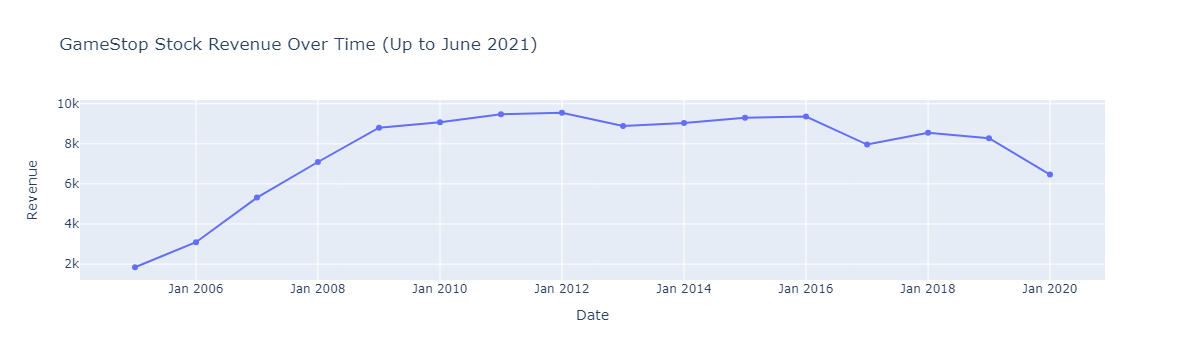

In [22]:
import pandas as pd
from bs4 import BeautifulSoup
import plotly.graph_objects as go

def make_graph(df, x_column, y_column, title):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df[x_column], y=df[y_column], mode='lines+markers', name=y_column))
    fig.update_layout(
        title=title,
        xaxis_title=x_column,
        yaxis_title=y_column,
        xaxis=dict(showgrid=True, tickformat='%b %Y'),  
        yaxis=dict(showgrid=True),
    )
    return fig

soup = BeautifulSoup(html_data_2, 'html.parser')

tabla = soup.find('table')
rows = tabla.find_all('tr') 
data = []
for row in rows[1:]:  
    cols = row.find_all('td')
    data.append([col.text.strip() for col in cols]) 

gamestop = pd.DataFrame(data, columns=["Date", "Revenue"])

gamestop["Revenue"] = gamestop['Revenue'].str.replace(',|\$', "", regex=True)
gamestop['Revenue'] = pd.to_numeric(gamestop['Revenue'], errors='coerce')

gamestop['Date'] = pd.to_datetime(gamestop['Date'], errors='coerce')

gamestop.dropna(subset=['Date', 'Revenue'], inplace=True)

gamestop.sort_values(by='Date', inplace=True)

gamestop = gamestop[gamestop['Date'] <= '2021-06-30']

fig = make_graph(gamestop, x_column='Date', y_column='Revenue', title="GameStop Stock Revenue Over Time (Up to June 2021)")
fig.show()


ModuleNotFoundError: No module named 'pandas'

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
